## Problem 1: Clustering




### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Loading the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.metrics import confusion_matrix

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Loading dataset

In [3]:
df1 = pd.read_csv("bank_marketing.csv")

### checking the first 5 rows of the data

In [4]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### checking the last 5 rows of the data

In [5]:
df1.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


### checking the dimensions of the dataset

In [6]:
df1.shape

(210, 7)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
# There are 7 variables and 210 records.
# There are no missing values based on intial analysis.
# All the variables are numeric.

### checking for missing value

In [9]:
df1.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
# there are no missing values

In [11]:
dup = df1.duplicated().sum()
dup

# number of duplicate rows

0

### Exploratory Data Analysis: 

### univariate analysis

#### descriptive analysis

In [12]:
df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [14]:
# We see that for most of the variables, mean and median(50th percentile) are nearly equal

# Std Deviation is high for spending variable

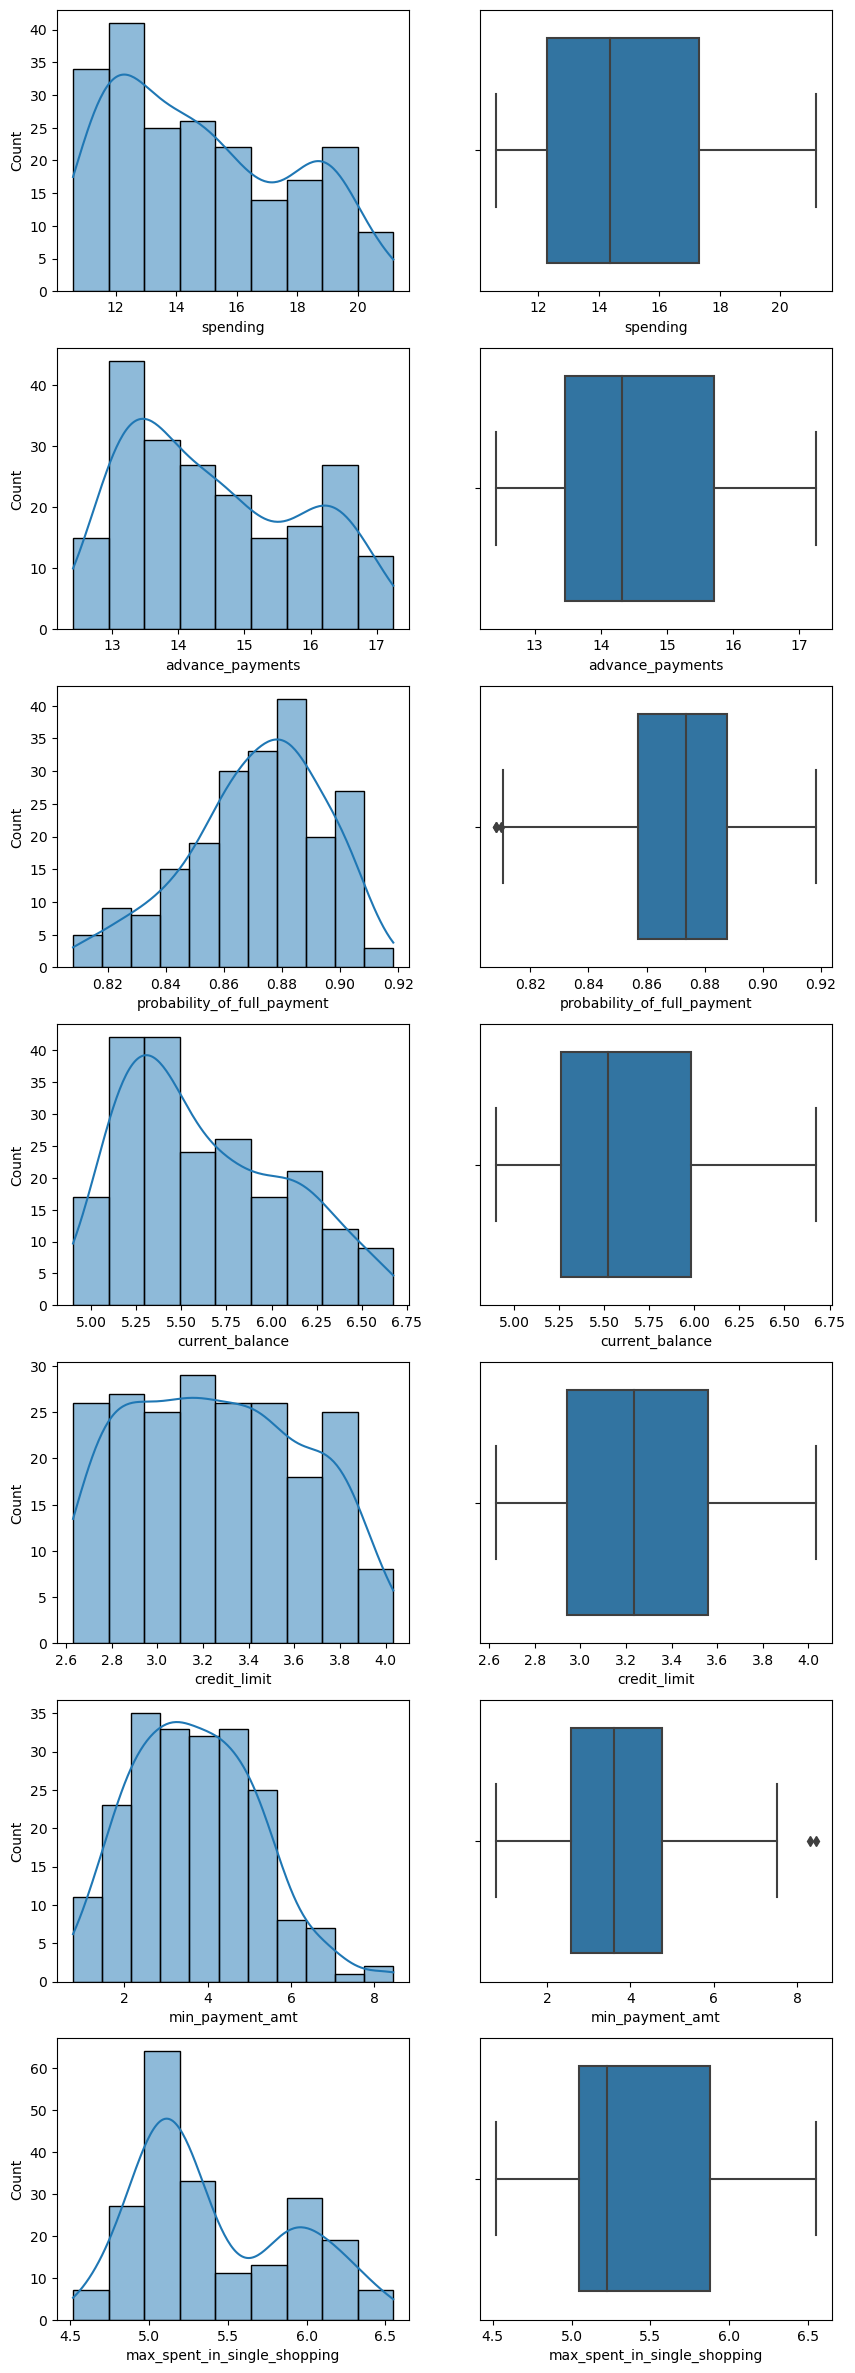

In [15]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,30)

sns.histplot(df1['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df1, ax=axes[0][1])

sns.histplot(df1['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df1 , ax=axes[1][1])

sns.histplot(df1['probability_of_full_payment'], kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment', data=df1, ax=axes[2][1])

sns.histplot(df1['current_balance'] , kde=True, ax=axes[3][0])
sns.boxplot(x='current_balance', data=df1 , ax=axes[3][1])

sns.histplot(df1['credit_limit'], kde=True, ax=axes[4][0])
sns.boxplot(x='credit_limit', data=df1, ax=axes[4][1])

sns.histplot(df1['min_payment_amt'] , kde=True, ax=axes[5][0])
sns.boxplot(x='min_payment_amt', data=df1 , ax=axes[5][1])

sns.histplot(df1['max_spent_in_single_shopping'], kde=True, ax=axes[6][0])
sns.boxplot(x='max_spent_in_single_shopping', data=df1, ax=axes[6][1])

plt.show()

In [16]:
# Both referral_exp_in_years and referral_current_salary have ouliers in upper values.
# Distrubtion is skewed to right tail for all the variable except probability_of_full_payment variable, which 
# has left tail

In [17]:
# checking the skewness values quantitatively

df1.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

### Multivariate analysis

In [18]:
# checking for multicollinearity

In [19]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


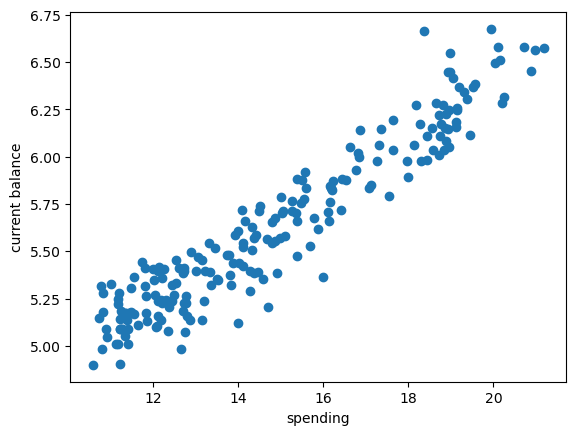

In [20]:
plt.scatter(df1['spending'],df1['current_balance'])
plt.xlabel('spending')
plt.ylabel('current balance');

In [21]:
# From the above plot we see that as the referral experience increases the salary is also increasing showing a 
# positive relationship

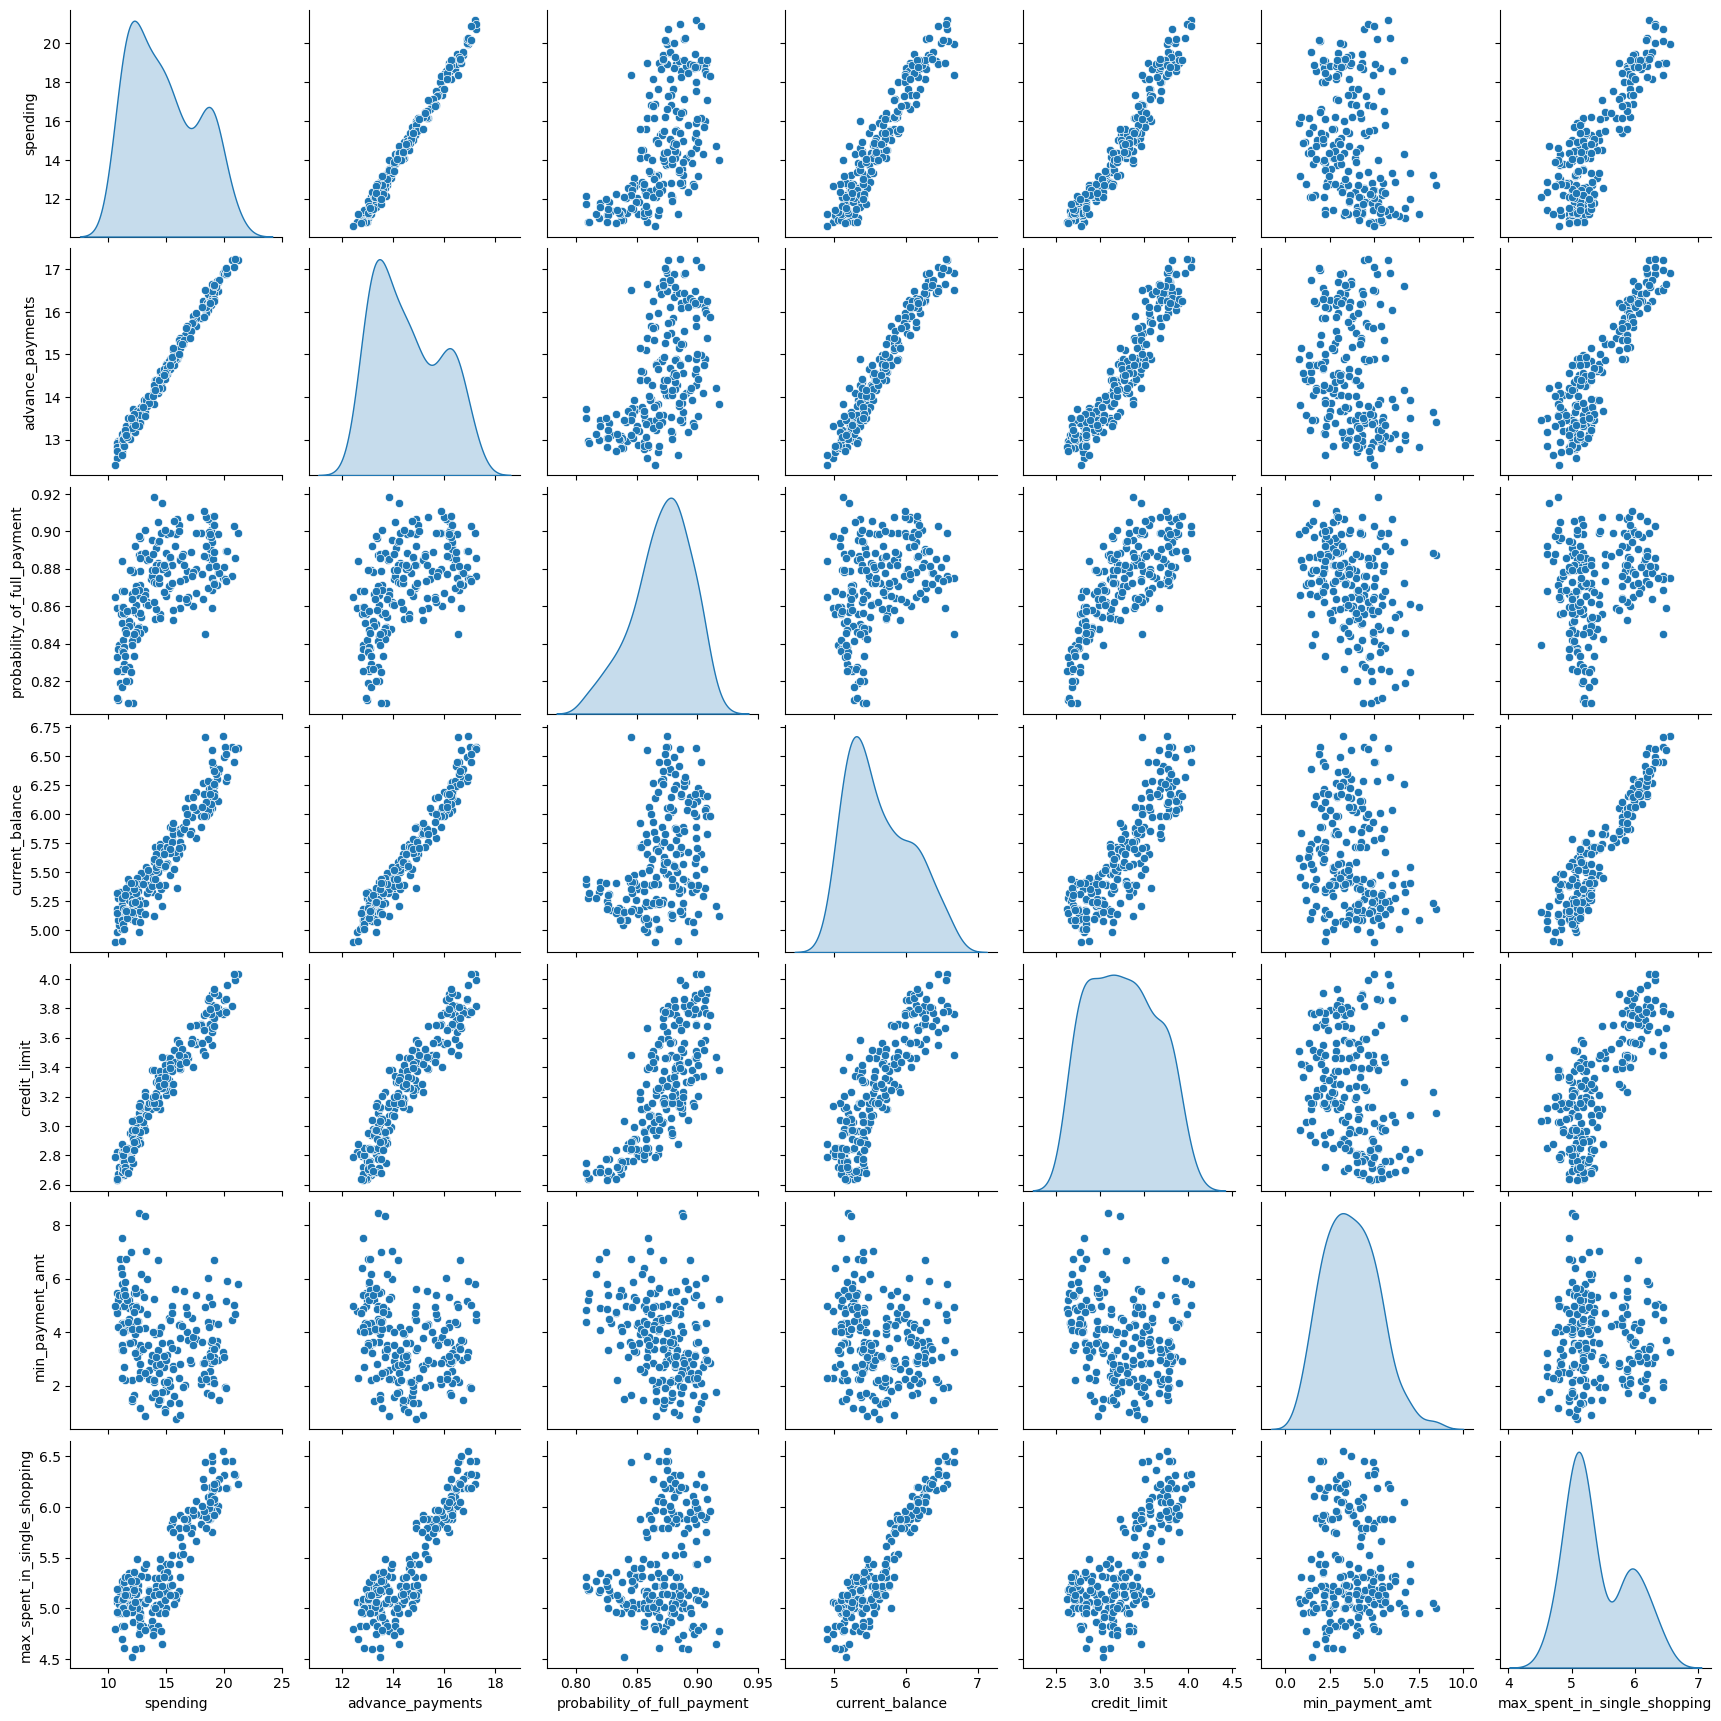

In [22]:
sns.pairplot(df1, diag_kind='kde');

In [23]:
# There is a strong positive correlation between the following:
        # spending & advance_payments
        # advance_payments & current_balance
        # credit_limit & spending
        # spending & current_balance
        # credit_limit & advance_payments
        # max_spent_in_single_shopping  current_balance

In [24]:
# correlation matrix

df1.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


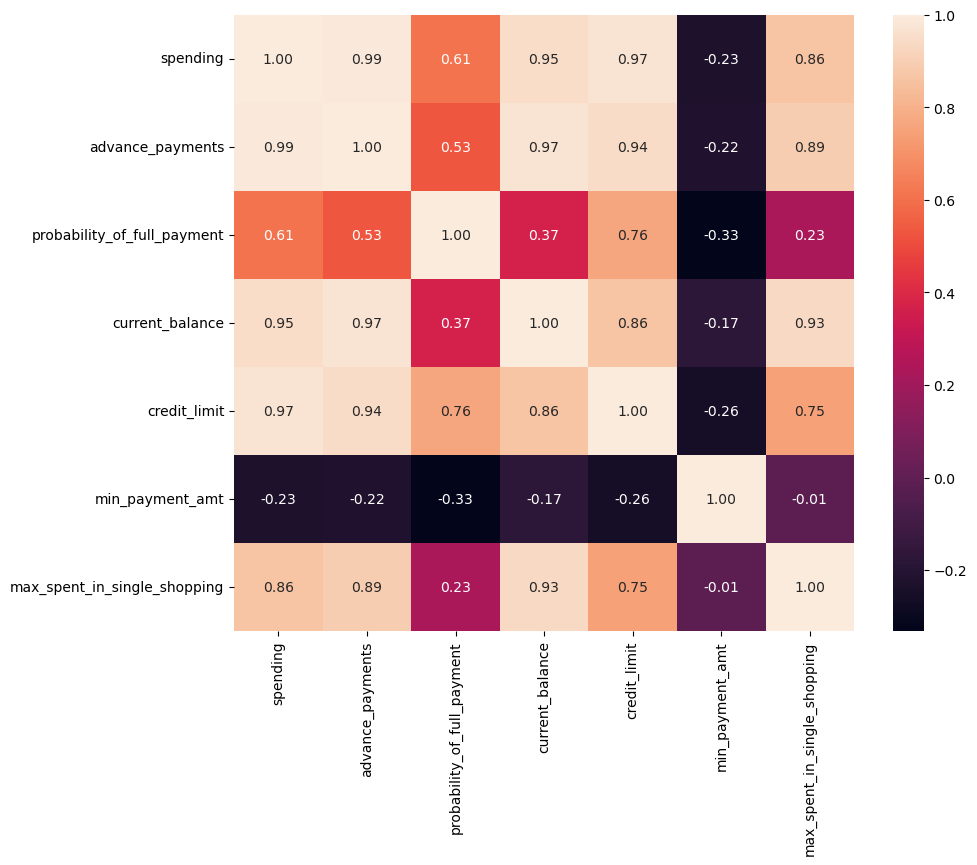

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f");

### 1.2  Do you think scaling is necessary for clustering in this case? Justify


In [26]:
# We can see that the values of the variables are different. Hence, scaling is required.
# spending, advance_payments are in different values and this may get more weightage.
# After scaling, all the variables will have the same range of values.

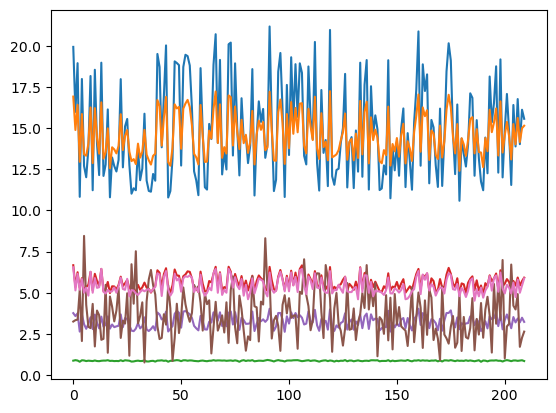

In [27]:
# before scaling

plt.plot(df1)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
df1_new = StandardScaler()

In [30]:
scaled_df1 = pd.DataFrame(df1_new.fit_transform(df1), columns=df1.columns)

In [31]:
scaled_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


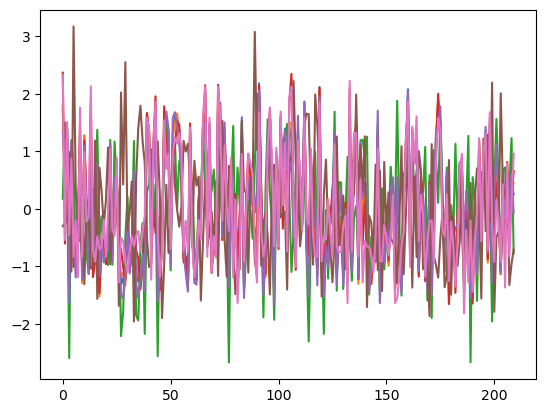

In [32]:
# after scaling

plt.plot(scaled_df1)
plt.show()

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [33]:
# importing dendogram and linkage 

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
# using ward method

In [36]:
wardlink = linkage(scaled_df1, method = 'ward')

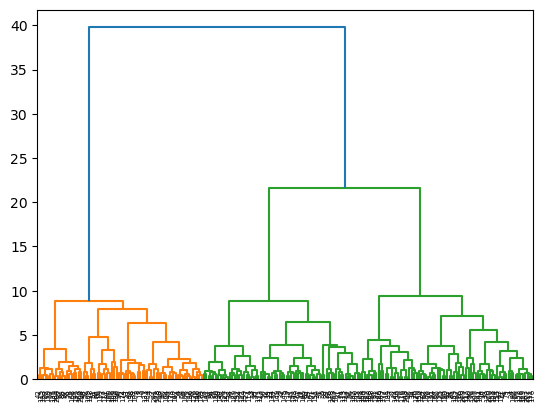

In [37]:
dend = dendrogram(wardlink)

In [38]:
# cutting the dendogram with suitable clusters

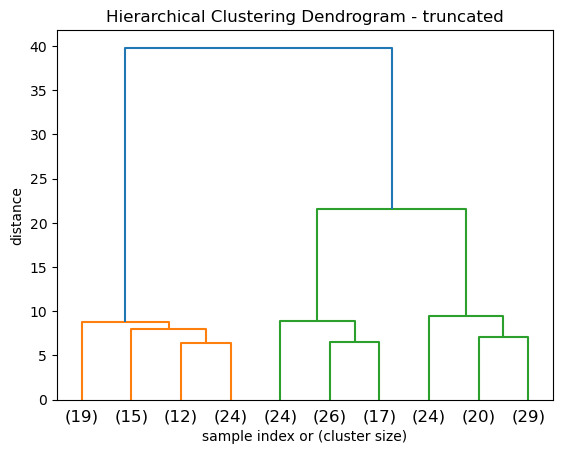

In [39]:
plt.title('Hierarchical Clustering Dendrogram - truncated')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,  # we are looking at the last 10 merges
                 )

In [40]:
from scipy.cluster.hierarchy import fcluster

In [41]:
#to create 3 clusters

cluster_3 = fcluster(wardlink, 3, criterion='maxclust')
cluster_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [42]:
cluster3_df1 = df1.copy()

In [43]:
cluster3_df1['H_clusters'] = cluster_3

In [44]:
cluster3_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [45]:
cluster3_df1['H_clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: H_clusters, dtype: int64

In [46]:
aggdata = cluster3_df1.groupby('H_clusters').mean()
aggdata['Freq']=cluster3_df1['H_clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [47]:
# For cluster grouping based on the dendrogram, 3 groups is good. 
# Taking 3 group clusters based on the hierarchical clustering

# Three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping 
# (high value item) and probability_of_full_payment(payment made).

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [48]:
from sklearn.cluster import KMeans 


In [49]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df1)
k_means.inertia_

1470.0

In [50]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df1)
k_means.inertia_

659.1717544870407

In [51]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df1)
k_means.inertia_

430.6589731513006

In [52]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df1)
k_means.inertia_

371.1846125351019

In [53]:
wss =[] 

In [54]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

In [55]:
wss

[1470.0,
 659.1717544870407,
 430.6589731513006,
 371.65314399951626,
 327.3281094192773,
 289.22019649887113,
 262.6730735038731,
 240.00303128531002,
 224.14618198742548,
 204.88373683888142]

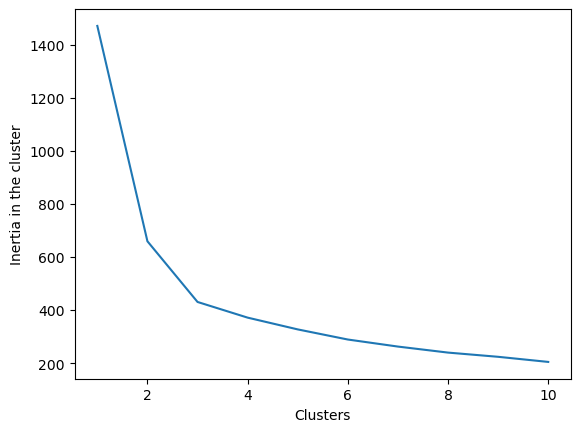

In [56]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [57]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(scaled_df1)
labels_4 = k_means_4.labels_

In [58]:
kmeans4_df1=df1.copy()

In [59]:
kmeans4_df1["Cluster_kmeans"] = labels_4
kmeans4_df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3


In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
silhouette_score(scaled_df1,labels_4)

0.32732359239831144

In [62]:
from sklearn import metrics


In [63]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(scaled_df1)
    scores.append(metrics.silhouette_score(scaled_df1, km.labels_))
    
scores

[0.46577247686580914,
 0.4007270552751298,
 0.3347542296283262,
 0.28621461554288646,
 0.2857268966525409,
 0.2756098749293962,
 0.24943558736282173,
 0.26663669211924323,
 0.27312884882199157]

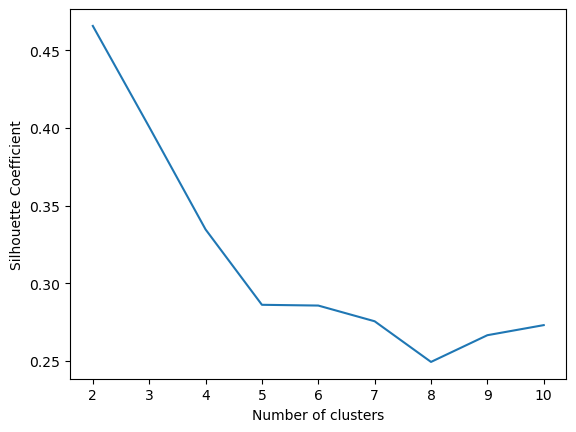

In [64]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [65]:
sil_width = silhouette_samples(scaled_df1,labels_4)

In [66]:
kmeans4_df1["sil_width"] = sil_width
kmeans4_df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3,0.450321
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1,0.042987
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3,0.456130
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.532008
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3,0.094511


In [67]:
silhouette_samples(scaled_df1,labels_4).min()

-0.06687035371860134

### 3 - Cluster

In [68]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [69]:
km_3.fit(scaled_df1)
km_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0], dtype=int32)

In [70]:
pd.Series(km_3.labels_).value_counts()

2    72
0    71
1    67
dtype: int64

### K-means clustering and cluster information

In [71]:
kmeans1_df1 = df1.copy()

In [72]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df1)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_df1['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0


Using 3 clusters via kmeans. Based on the dataset given, 3 cluster solution is good to use based on the spending pattern (High, Medium, Low)

In [73]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T

In [74]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [75]:
# 3 cluster via hierarchical clustering

In [76]:
aggdata.T

H_clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


Group 1 : High Spending

Group 3 : Medium Spending

Group 2 : Low Spending

Group 1

- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

Group 3

- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

Group 2

- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

## Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and do exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference about which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

#### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in the percentage of sales)
10. Age of insured (Age)

In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## 2.1 Read the data, do the necessary initial steps, and do exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


### Loading the Dataset

In [78]:
df2 = pd.read_csv("insurance.csv")

### Checking first five rows of the dataset

In [79]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Checking the dimensions of the dataset

In [80]:
df2.shape

(3000, 10)

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB



Below are the observations:

10 variables
Age, Commision, Duration, Sales are numeric variable, rest are categorial variables
3000 records
9 independant variable and one target variable - Clamied

### Checking for missing values

In [82]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no missing values

In [83]:
dup = df2.duplicated().sum()
dup

139

There are 139 duplicate records, but it can be of different customers, 
There is no customer ID or any unique identifier, so no need to drop duplicates

### Checking Descriptive Statistics

In [84]:
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [85]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


Duration column has negative value.


Technically its not possible
mean and median varies significantly for commission


### Plotting boxplots and histplots

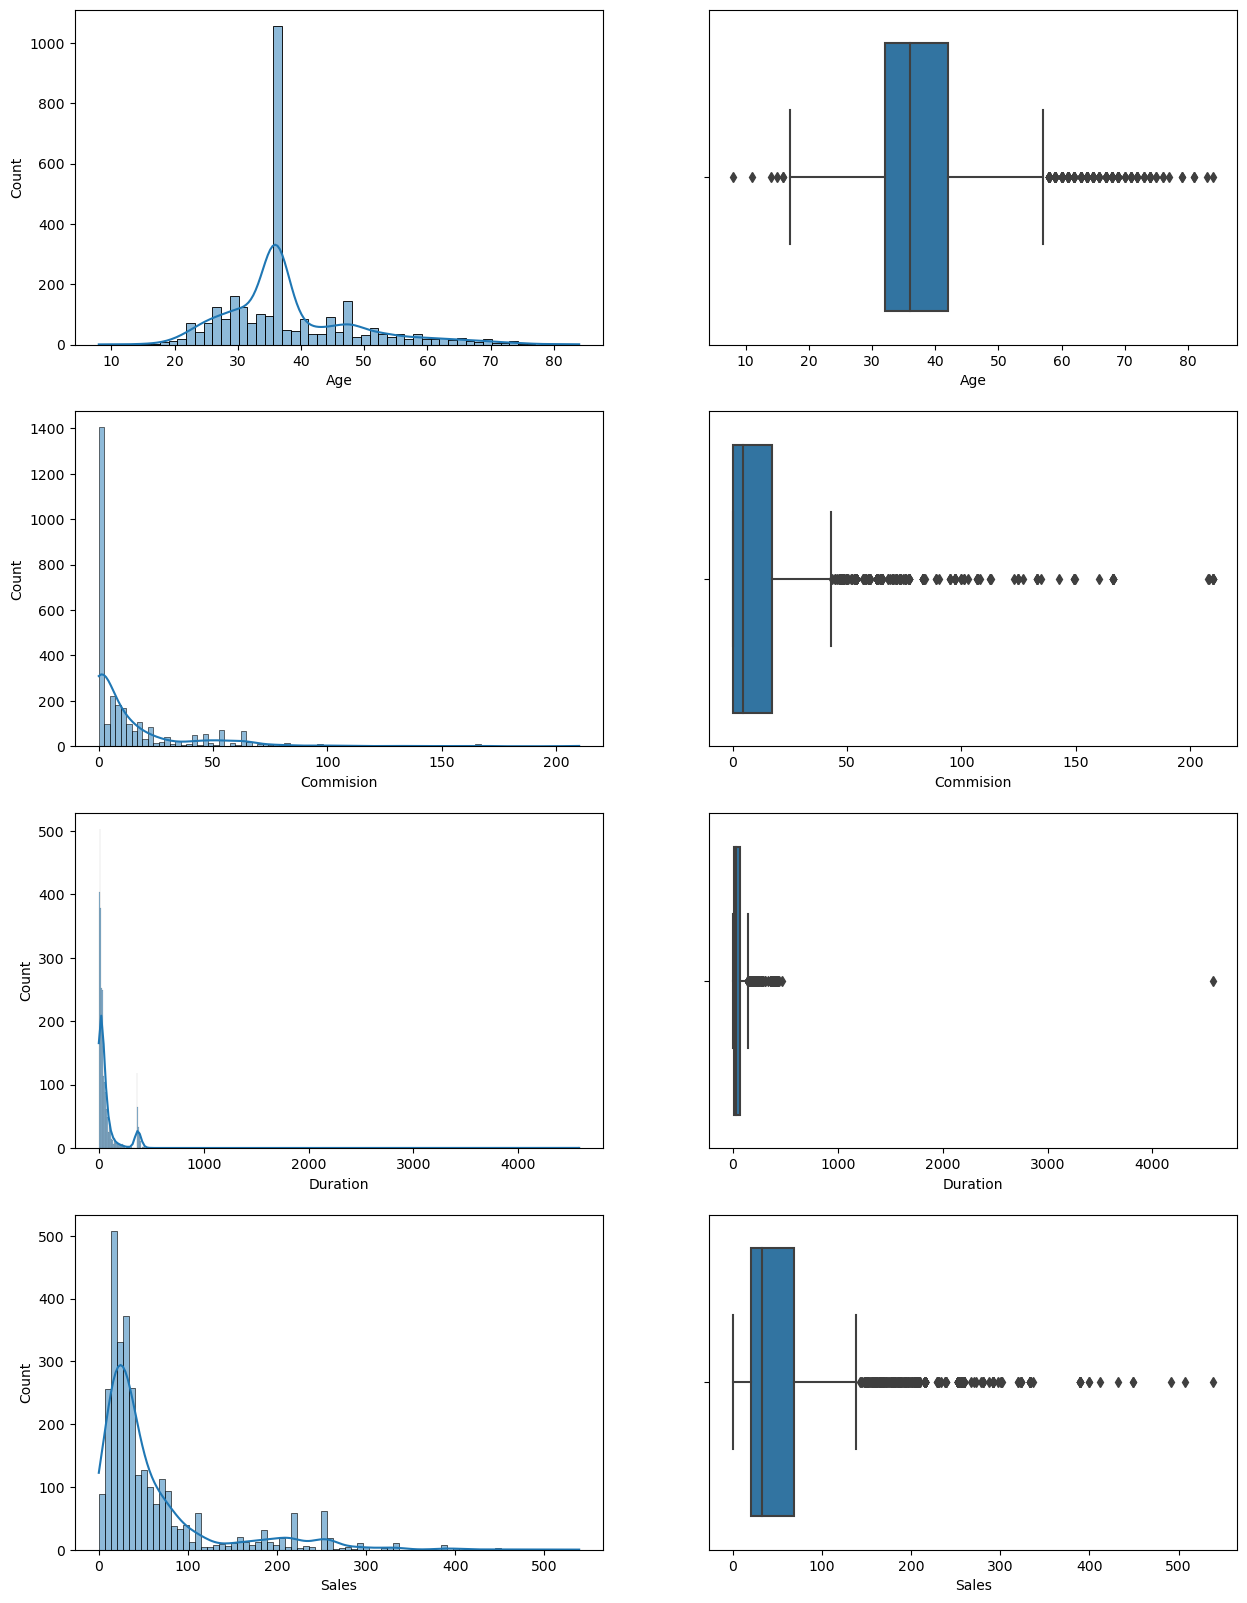

In [86]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)

sns.histplot(df2['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df2, ax=axes[0][1])

sns.histplot(df2['Commision'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Commision', data=df2 , ax=axes[1][1])

sns.histplot(df2['Duration'], kde=True, ax=axes[2][0])
sns.boxplot(x='Duration', data=df2, ax=axes[2][1])

sns.histplot(df2['Sales'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Sales', data=df2 , ax=axes[3][1])

plt.show()

### Plotting scatter plot

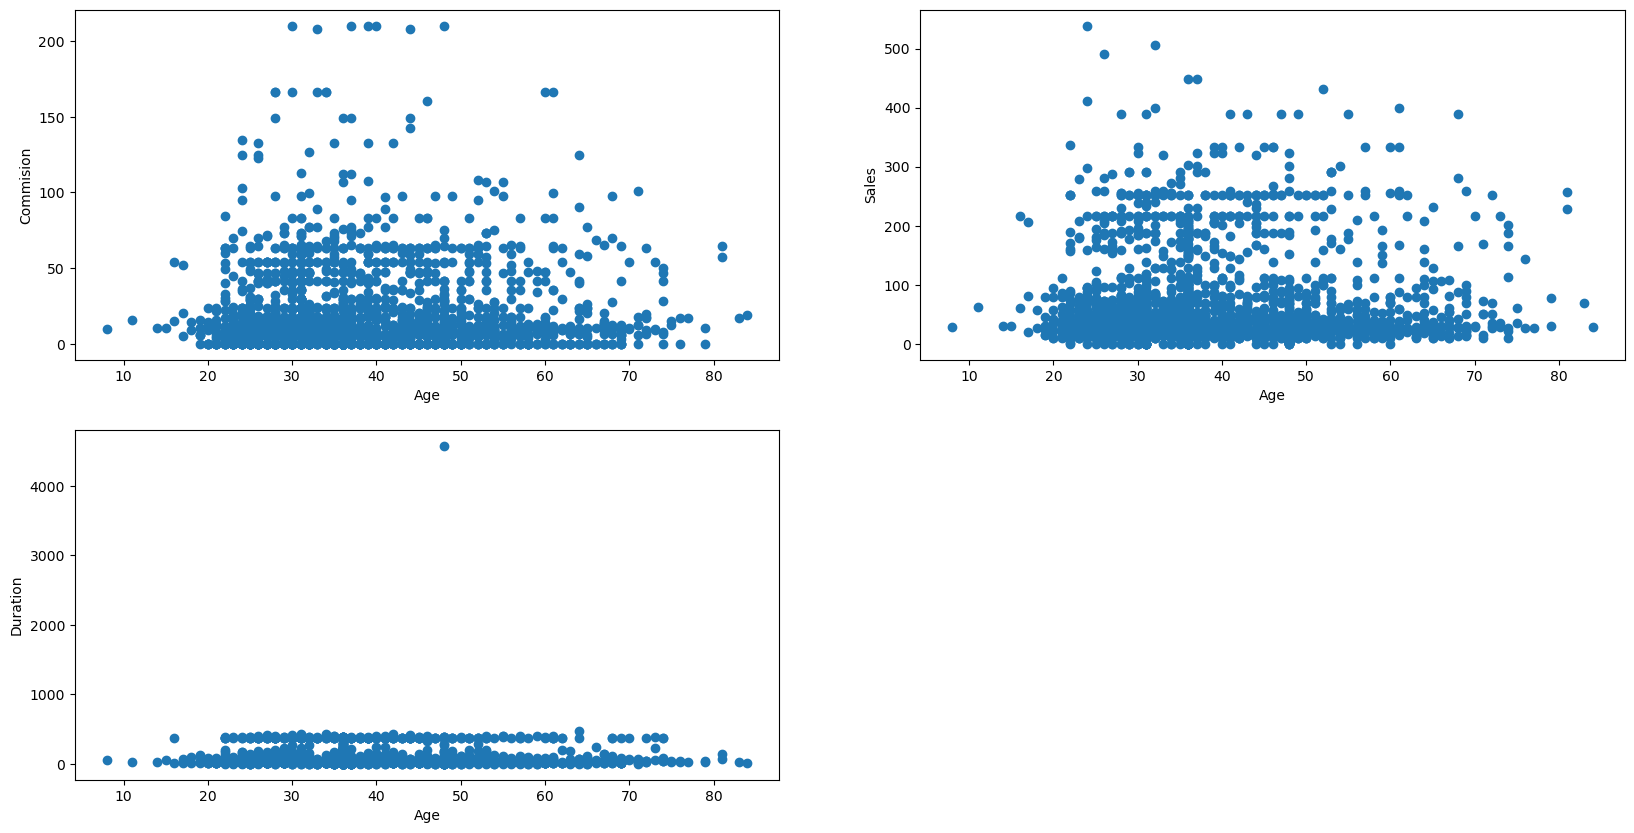

In [87]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.scatter(df2['Age'],df2['Commision']);
plt.xlabel('Age')
plt.ylabel('Commision')

plt.subplot(2,2,2)
plt.scatter(df2['Age'],df2['Sales']);
plt.xlabel('Age')
plt.ylabel('Sales')

plt.subplot(2,2,3)
plt.scatter(df2['Age'],df2['Duration']);
plt.xlabel('Age')
plt.ylabel('Duration');


### Checking pairwise distribution of the continuous variables

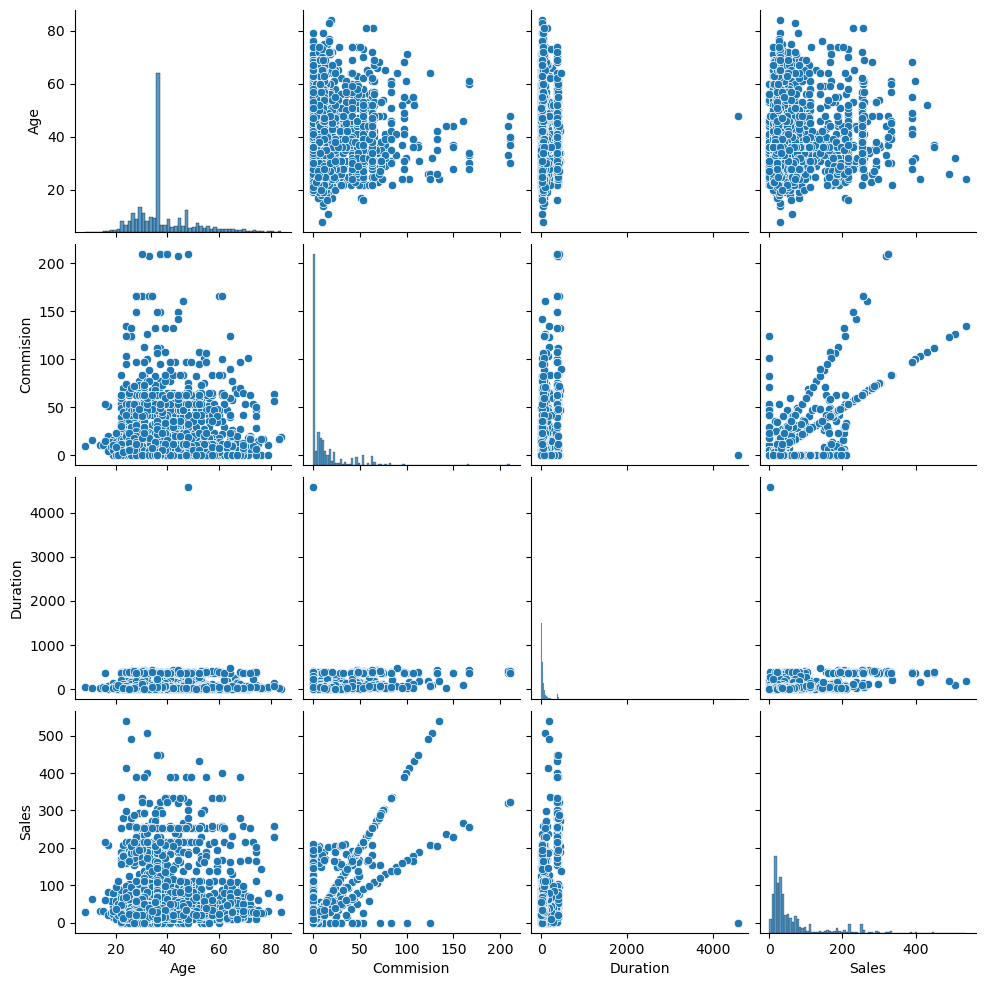

In [88]:
sns.pairplot(df2);

### Checking for correlations

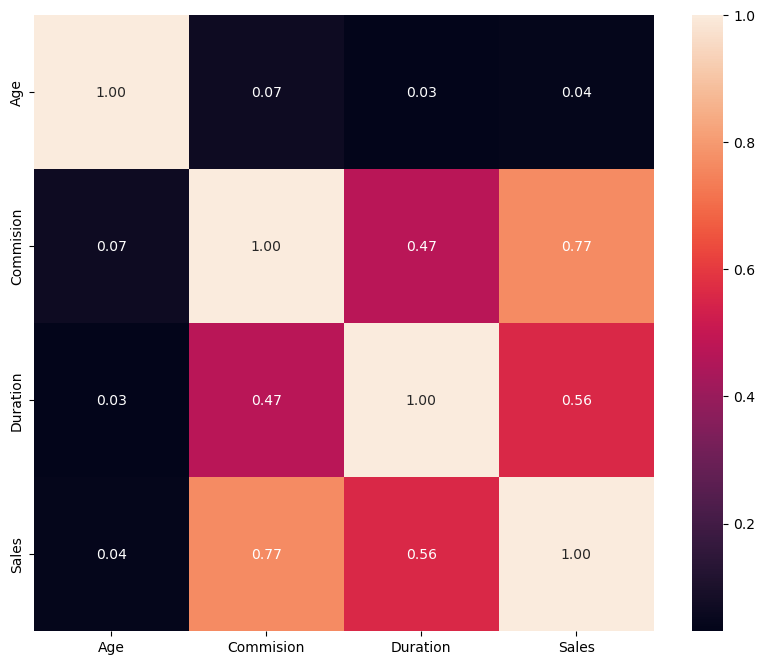

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True,fmt=".2f");

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

### Converting all objects to categorical codes

In [90]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [92]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Dropping Claimed column

In [93]:
X = df2.drop("Claimed" , axis=1)

Y = df2.pop("Claimed")

In [94]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Before Scaling:

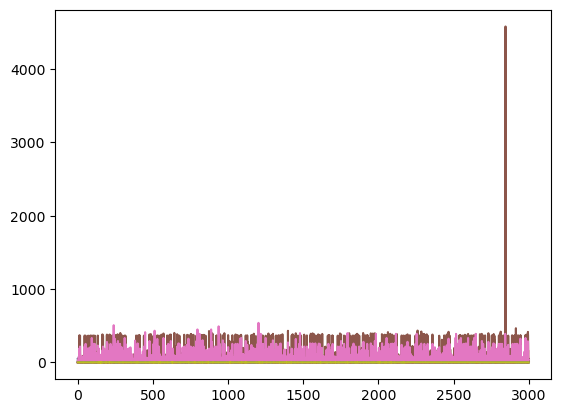

In [95]:
plt.plot(X)
plt.show()

### Performing Scaling using zscore

In [96]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


### After Scaling:

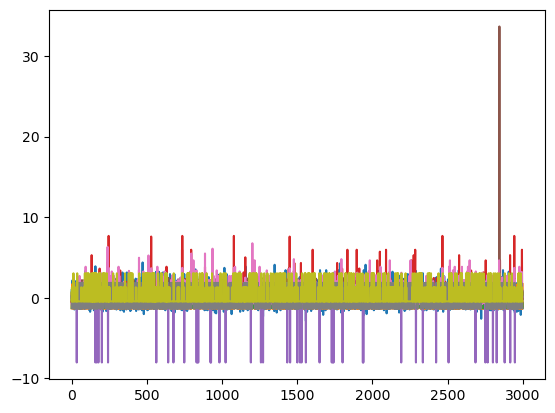

In [97]:
plt.plot(X_scaled)
plt.show()

### splitting data into training and test set


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

### Checking the dimensions of training and test data

In [99]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


### Build classification model CART - Decision Tree Classifier:

In [100]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [101]:
pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

,Imp
Age,0.177894
Agency_Code,0.194770
Type,0.000383
Commision,0.095127
Channel,0.007262
Duration,0.262122
Sales,0.199864
Product Name,0.043258
Destination,0.019321


In [102]:
y_predict = dt_model.predict(X_test)

In [103]:
# Regularize the Decision Tree and Check the train and test score after regularization

In [104]:
params = {'criterion':['gini', 'entropy'],
         'max_depth':[5,6,7,9,10,11,13,15,16],
          'min_samples_split':list(range(1,20)),
         "min_samples_leaf":list(range(1,20))}

In [105]:
from sklearn.model_selection import GridSearchCV
grid_Dec = GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,verbose=1)
grid_Dec.fit(X_train, train_labels)

Fitting 5 folds for each of 6498 candidates, totalling 32490 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 10, 11, 13, 15, 16],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [106]:
grid_Dec.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 18}

In [107]:
reg_dt_model = DecisionTreeClassifier(criterion='gini',max_depth= 6,min_samples_leaf=16,min_samples_split=2)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=16)

In [108]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.177894
Agency_Code   0.194770
Type          0.000383
Commision     0.095127
Channel       0.007262
Duration      0.262122
Sales         0.199864
Product Name  0.043258
Destination   0.019321


In [109]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.052149
Agency_Code   0.534904
Type          0.006618
Commision     0.029646
Channel       0.000000
Duration      0.044967
Sales         0.263391
Product Name  0.068324
Destination   0.000000


In [110]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [111]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [112]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [113]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [114]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [115]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
print(best_grid_dtcl)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 46, 'min_samples_split': 280}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=46, min_samples_split=280,
                       random_state=1)


In [116]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4,5,6,7,8,9,10,11],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [117]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 42, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=42, min_samples_split=200,
                       random_state=1)

In [118]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [119]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns))

                   Imp
Age           0.026631
Agency_Code   0.604561
Type          0.000000
Commision     0.022472
Channel       0.000000
Duration      0.036387
Sales         0.254851
Product Name  0.055097
Destination   0.000000


In [120]:
ytrain_predict_dt = best_grid_dtcl.predict(X_train)
ytest_predict_dt = best_grid_dtcl.predict(X_test)

In [121]:
ytest_predict_dt
ytest_predict_prob_dt=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dt
pd.DataFrame(ytest_predict_prob_dt).head()

,0,1
0,0.935714,0.064286
1,0.394089,0.605911
2,0.394089,0.605911
3,0.311111,0.688889
4,0.927586,0.072414


### Build Random Forest with n_estimators = 501, random_state=1 and do GridSearchCV with the following parameters.


'criterion' : ["gini", "entropy"]

'max_depth': [5, 7],

'max_features': [4, 6],

'min_samples_leaf': [50, 100],

'min_samples_split': [20, 50],

'n_estimators': [301, 501]


cv = 3

In [122]:
rfcl = RandomForestClassifier(n_estimators = 501,random_state=0)


In [123]:
from sklearn.model_selection import GridSearchCV

param_grid_rfcl = {
    'max_depth': [5, 7],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [20, 50],
    'n_estimators': [301, 501]
}

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)


In [124]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 20, 'n_estimators': 501}


RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=50,
                       min_samples_split=20, n_estimators=501, random_state=0)

In [125]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [126]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.714285,0.285715
1,0.554773,0.445227
2,0.594591,0.405409
3,0.302450,0.697550
4,0.922878,0.077122


In [127]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns))

                   Imp
Age           0.025308
Agency_Code   0.356866
Type          0.059450
Commision     0.126849
Channel       0.000000
Duration      0.040475
Sales         0.150499
Product Name  0.235066
Destination   0.005486


### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, classification reports for each model. 

## For CART model:

### CART - AUC and ROC for the training data

AUC: 0.835


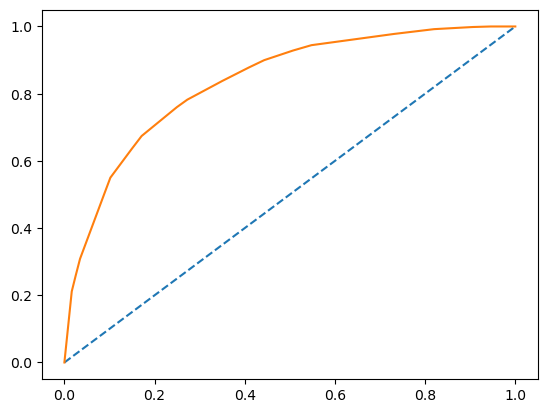

In [128]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

### CART - AUC and ROC for the test data

AUC: 0.792


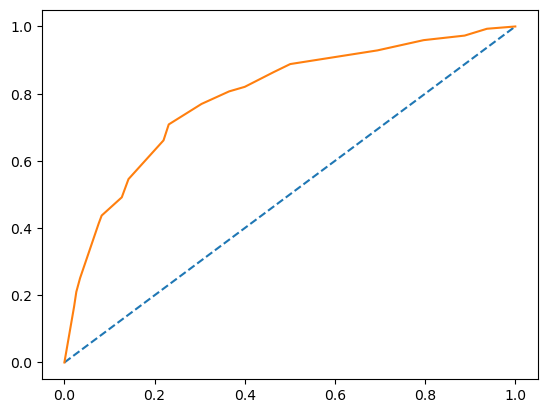

In [129]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);

### Train accuracy (CART model)

In [130]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7938095238095239

### Test Accuracy (CART model)

In [131]:
cart_test_acc=best_grid_dtcl.score(X_test,test_labels) 
cart_test_acc

0.76

In [132]:
# Using Scikit-learn metrics, print confusion matrix and classification report

In [133]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### confusion matrix for training data (CART model)

In [134]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[1321,  150],
       [ 283,  346]])

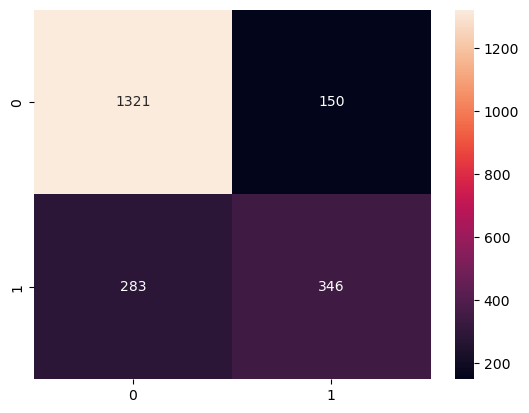

In [135]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_dt),annot=True,fmt='.4g');

### confusion matrix for test data (CART model)

In [136]:
confusion_matrix(test_labels,ytest_predict_dt)


array([[555,  50],
       [166, 129]])

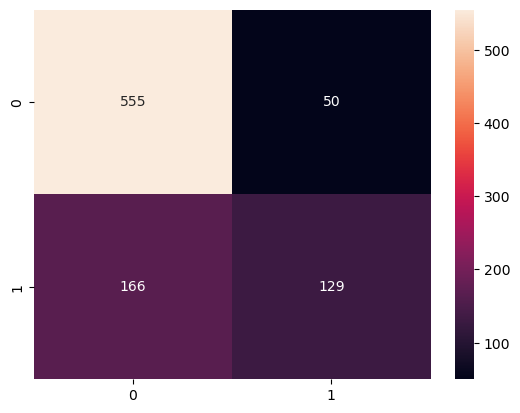

In [137]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_dt),annot=True,fmt='.4g');

### Classification Report for train data (CART model)

In [138]:
print(classification_report(train_labels,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.70      0.55      0.62       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.79      0.79      0.79      2100



### Classification Report for test data (CART model)

In [139]:
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [140]:
cart_metrics=classification_report(train_labels, ytrain_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.55
cart_train_f1  0.62


In [141]:
cart_metrics=classification_report(test_labels, ytest_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.44
cart_test_f1  0.54


### CART Train data: 

AUC: 83%

Accuracy: 79%

Precision: 70%

f1-Score: 62%


### CART Test data:

AUC: 79%

Accuracy: 76%

Precision: 72%

f1-Score: 54%

Training and Test set results are almost similar with high values

## For Random Forest model:

### train data

In [142]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1326,  145],
       [ 281,  348]])

In [143]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.7971428571428572

In [144]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.55      0.62       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.80      0.79      2100



In [145]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.55
rf_train_f1  0.62


Area under Curve is 0.8344998535545183


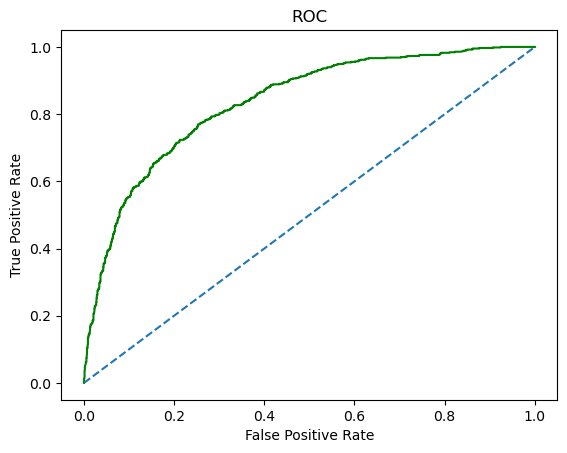

In [146]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### test data

In [147]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[552,  53],
       [162, 133]])

In [148]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7611111111111111

In [149]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       605
           1       0.72      0.45      0.55       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.70       900
weighted avg       0.75      0.76      0.74       900



In [150]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.45
rf_test_f1  0.55


Area under Curve is 0.814245692674044


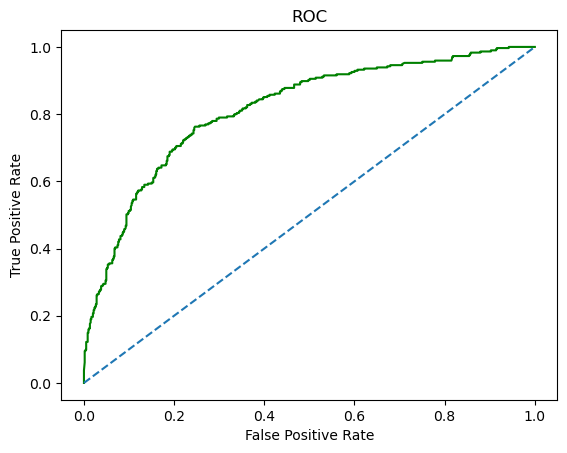

In [151]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### RF train data:

AUC: 83%

Accuracy: 80%

Precision: 71%

f1-Score: 62


### RF test data:

AUC: 81%

Accuracy: 76%

Precision: 72%

f1-Score: 55


Train and test data also have similar values for random forest model

### 2.4 Final Model: Compare all the models and write an inference about which model is best/optimized.

### Comparing Confusion Matrices from All the models for the Train Set. [Plot/Print the confusion matrices for all the training sets].

In [152]:
best_grid_dtcl = grid_search_dtcl.best_estimator_
print(best_grid_dtcl)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=42, min_samples_split=200,
                       random_state=1)


In [153]:
best_grid = best_grid_dtcl

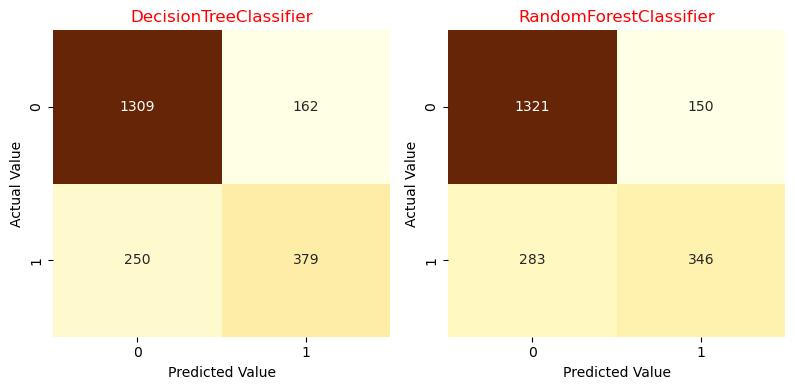

In [154]:
models=[reg_dt_model,best_grid]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(train_labels, models[i].predict(X_train)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

### Comparing Confusion Matrices from All the models for the Test Set. [Plot/Print the confusion matrices for all the test sets].

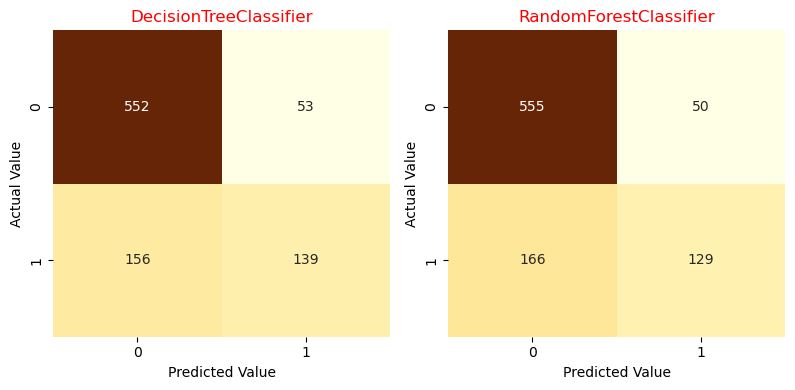

In [155]:
models=[reg_dt_model,best_grid]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(test_labels, models[i].predict(X_test)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

### Comparison of the performance metrics from the 3 models

In [156]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test
Accuracy,0.79,0.76,0.80,0.76
AUC,0.84,0.79,0.83,0.81
Recall,0.55,0.44,0.55,0.45
Precision,0.70,0.72,0.71,0.72
F1 Score,0.62,0.54,0.62,0.55


### ROC Curve for the 2 models on the Training data

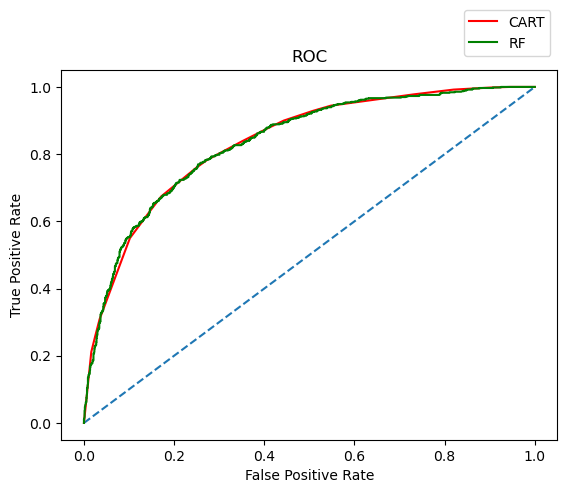

In [157]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

### ROC Curve for the 2 models on the Test data

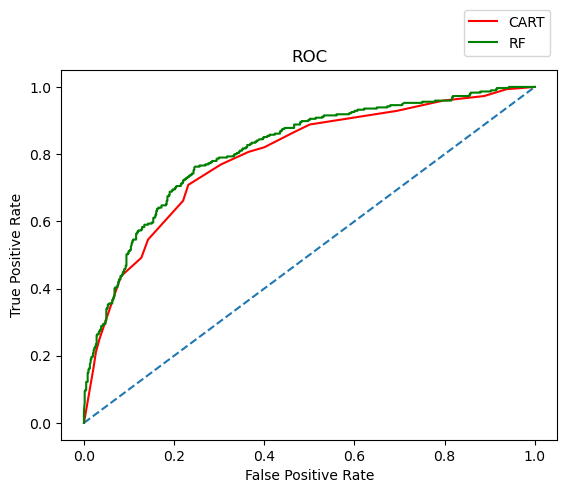

In [158]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

RF model is best optimized, as it has little better accuracy, precision, recall, f1 score better than CART model.

### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations


If there is a possibility of more real time data or already processed data, then we can have a better understanding
This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.
• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. 
• As per the data, 90% of insurance is done by online channel. 
• Other interesting fact, is almost all the offline business has a claimed associated, need to find why? 
 • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. 
Key performance indicators (KPI) The KPI’s of insurance claims are: 
• Reduce claims cycle time 
• Increase customer satisfaction 
• Combat fraud 
• Optimize claims recovery 
• Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.
